## Use Case : A/B Testing numerical measurements

A financial tech company 'X' want to test whether their new app design help people to increase the amount of many that they save (saving rate). Savings rate is the percentage of each user’s monthly paycheck that he or she saves
1. Six months ago, our client randomly selected 1,000 newly signed up users and assigned 500 of them to the current design and 500 to the new design.
1. The control group went on to use the current app.
1. All users started with a 0% savings rate.
The 1,000 users represent just a small portion of the app’s total users.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import pingouin as pg

In [2]:
np.random.seed(24)
y_A = np.random.normal(12,5,500)
y_B = np.random.normal(15,5,500)

In [3]:
df_old = pd.DataFrame({'design': 'old design', 'saving%': y_A})
df_new = pd.DataFrame({'design': 'new design', 'saving%': y_B})

df = df_old.append(df_new)
df

,design,saving%
0,old design,18.646061
1,old design,8.149833
2,old design,10.418598
3,old design,7.045948
4,old design,6.645919
...,...,...
495,new design,10.563805
496,new design,16.025084
497,new design,19.234105
498,new design,23.694482


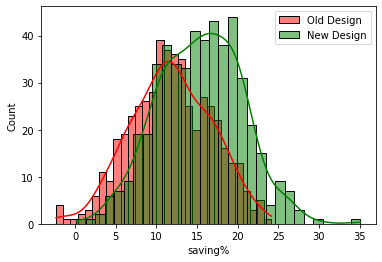

In [4]:
sns.histplot(df[df['design'] == 'old design']['saving%'], bins=30, color='red', label='Old Design', kde=True)
sns.histplot(df[df['design'] == 'new design']['saving%'], bins=30, color='green', label='New Design', kde=True)
plt.legend()
plt.show()

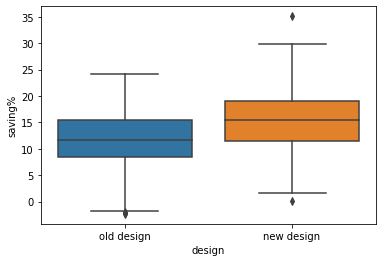

In [5]:
sns.boxplot(x='design', y='saving%', data=df)
plt.show()

In [6]:
by_design = df.groupby('design')
by_design.describe()

saving%                                                       \
             count       mean       std       min        25%        50%   
design                                                                    
new design   500.0  15.346641  5.157331  0.163051  11.552647  15.482752   
old design   500.0  11.789305  4.967705 -2.350481   8.488016  11.699120   

                                  
                  75%        max  
design                            
new design  19.014818  35.096915  
old design  15.422103  24.129200

PICOT:

H0 : X financial tech company's clients who recieved new layout will have the same saving rate mean than clients that recieved old layout
<br>
H1 : X financial tech company's clients who recieved new layout will have higher saving rate mean than clients that recieved old layout


bahasa sederhana:

H0 : mu_old = mu_new
<br>
H1 : mu_old < mu_new

In [20]:
alpha = 0.05/2
t_crit = -1.984 # ini lihat dari table T-Distribution

tstat, pvalue = list(stats.stats.ttest_ind(
    df[df['design'] == 'old design']['saving%'],
    df[df['design'] == 'new design']['saving%'],
    equal_var = True
)) # urutan berpengaruh
print('alpha:', alpha)
print('pvalue:', pvalue)
print('tcrit:', t_crit)
print('tstat', tstat)

alpha: 0.025
pvalue: 4.114133042209267e-27
tcrit: -1.984
tstat 11.108414528484657


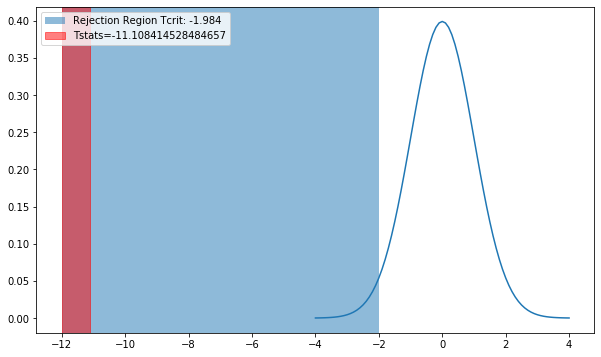

In [15]:
n = len(df)
x_axis = [i/10 for i in range(-40,41)]
y_axis = [stats.t.pdf(i,n-1) for i in x_axis]

plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis)
plt.axvspan(t_crit,-12,alpha=0.5,label=f'Rejection Region Tcrit: {t_crit}')
plt.axvspan(tstat,-12,alpha=0.5,color='red', label=f'Tstats={tstat}')
plt.legend(loc='upper left')
plt.show()

The P-value is lower than our significant level 0.025, it means we have enough evidence to reject the Null Hypothesis. So, X financial tech company's clients who recieved new layout will have higher saving rate mean than clients that recieved old layout.